<a href="https://colab.research.google.com/github/vikaxis/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Airbnb Booking Analysis**

**Project Description**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. 

Explore and analyse the data to discover key understandings.
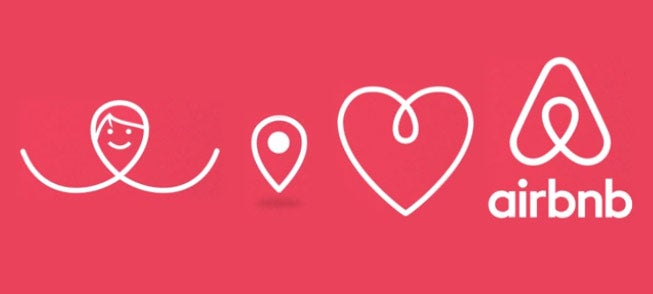

# **Importing Dataset**

In [1]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Let us read our data first**

In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/Project Python/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

In [4]:
df.shape

(48895, 16)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **Processing Dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# Checking Null Value of given data
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Remove Less important columns i.e. "last_review", "name" & "host_id"
new_df = df.drop(['name', 'host_id', 'last_review'], axis=1)

In [12]:
# Let us check New Data Frame
new_df.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## **Data Cleaning**

In [13]:
# Let us check New Data Frame Null Value
new_df.isnull().sum()

id                                    0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Checked reviews_per_month column to get idea of it's values
new_df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [15]:
# replacing null values with 0 in columns - reviewa_per_month & host_id
new_df.fillna(value={'reviews_per_month' : 0}, inplace=True)
new_df.fillna(value={'host_name' : 0}, inplace=True)

In [16]:
# Handled Null Values
new_df.isnull().sum()

id                                0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **Exploratory Data Analysis**

**Find out the number of hotels in different neighbourhood_group**

In [17]:
new_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

According to Data, Manhattan and Brooklyn have the highest number of hotels while Staten Island having the least no. of hotels.

**Find out the top 10 most popular neighbourhoods as per Data**

In [18]:
new_df['neighbourhood'].value_counts()[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

As per Data These two neighbours Williamsburg & Bedford-Stuyvesant have highest no. of Hotels.

**Count the Different types of Hotels**

In [19]:
new_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff10ee34f10>,
 [Text(-0.10804295026860757, 1.7466615931247975, 'Entire home/apt'),
  Text(-0.022318937081566743, -1.749857669939915, 'Private room'),
  Text(1.7950027731153102, -0.1340337439167686, 'Shared room')],
 [Text(-0.0617388287249186, 0.9980923389284555, ' 52%'),
  Text(-0.01275367833232385, -0.9999186685370942, ' 46%'),
  Text(1.0470849509839308, -0.07818635061811499, ' 2%')])

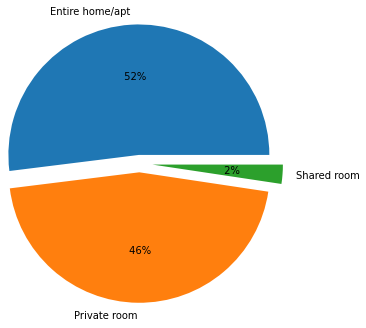

In [20]:
#Create Chart to show the percentage of Room Types
x = new_df.groupby('room_type')['id'].count().reset_index().rename(columns={'id': 'Count'})
plt.pie(x['Count'], labels=x['room_type'], radius=1.5, explode=[0.1,0.1,0.15],autopct='% 1.0f%%')


#To “explode” a pie chart means to make one of the wedges of the pie chart to stand out. To make this possible in matplotlib , we use the explode() parameter.
#autopct enables you to display the percent value using Python string formatting.
# For example, if autopct='%. 2f', then for each pie wedge, the format string is '%. 2f' and the numerical percent value for that wedge is pct , so the wedge label is set to the string '%.

**Conclusion on the basis of Room Types Pie Chart**

1. According to data, the Most Popular Room Types is 'Entire home/apt' followed by 'Private room'
2. The Least popular Room Types is 'Shared Rooms'
3. The maximum demand is for private rooms and entire home/apartment.



**Lets Find Different types of hotels in each neighbourhood**

Text(0.5, 1.0, 'Hotel types in different Areas')

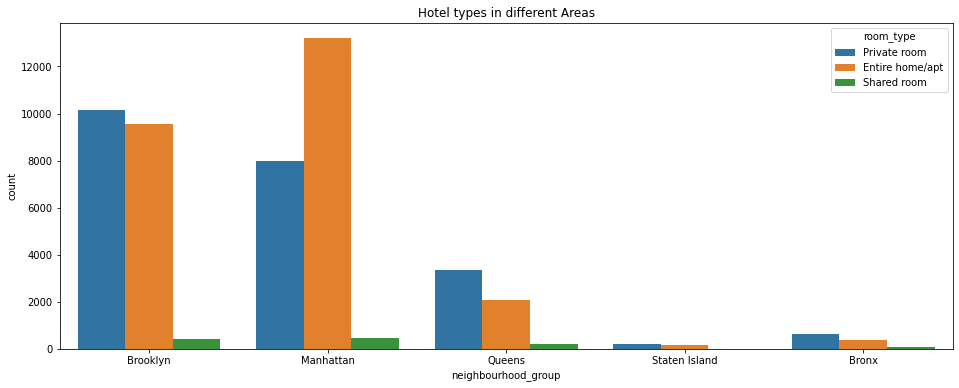

In [21]:
plt.figure(figsize=[16,6])
sns.countplot(data=new_df, x='neighbourhood_group', hue='room_type')
plt.title('Hotel types in different Areas')

1. In Manhattan, the Most popular Hotels types is 'Entire home/apt' followed by Brooklyn, Queens.
2. 'Private room' is the most popular among Brooklyn(Highest), Queens, Bronx.
3. The 'shared room' hotel type is least popular among all the neighbourhood_groups.

**Calculate no. of reviews of neighbourhood group**

In [22]:
# Find out the average reviews of a neighbourhood_group
reviews = new_df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
print(reviews)

  neighbourhood_group  number_of_reviews
0               Bronx          26.004583
1            Brooklyn          24.202845
2           Manhattan          20.985596
3              Queens          27.700318
4       Staten Island          30.941019


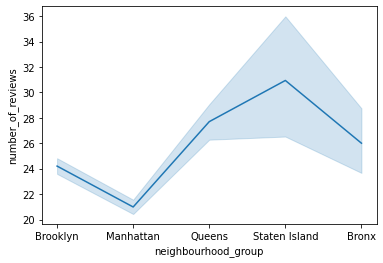

In [23]:
sns.lineplot(data = new_df, x='neighbourhood_group', y='number_of_reviews')

According to data, Staten Island has the highest average number of reviews while Manhattan having the lowest average among the neighbourhood groups.

In [24]:
# count the reviews of all neighbourhood_group
reviews_count = new_df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
print(reviews_count)

  neighbourhood_group  number_of_reviews
0               Bronx              28371
1            Brooklyn             486574
2           Manhattan             454569
3              Queens             156950
4       Staten Island              11541


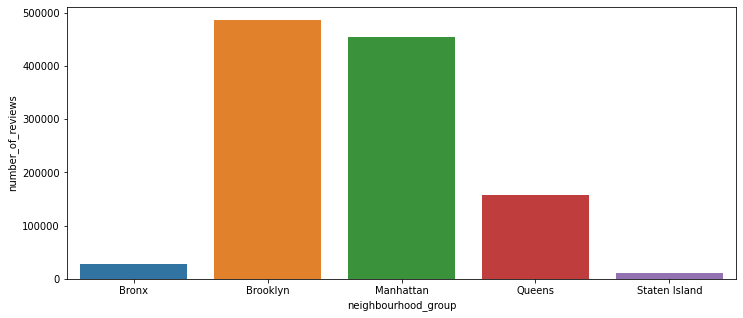

In [25]:
plt.figure(figsize=[12,5])
sns.barplot(data = reviews_count, x='neighbourhood_group', y='number_of_reviews')

1. According to chart, Brooklyn has the highest reviews count followed by Manhattan among the all neighbourhood_group.
2. Staten Island has the lowest reviews count thats why it had such a high average review per hotel.
3. According to data we conclude - More reviews a hotel gets, it is assumed to be more trusty/popular and more likely it is to be visited by other people.
4. Here Brooklyn and Manhattan have the highest number of reviews.
5. As per chart the count reviews order is :  Brooklyn > Manhattan > Queens > Bronx > Staten Island, which is exactly the order of prices of hotels.

**count number of reviews a room_type gets in a neighbourhood_group**

In [26]:
count_reviews_room_type = new_df.groupby(['neighbourhood_group', 'room_type'])['number_of_reviews'].sum().reset_index()
count_reviews_room_type

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


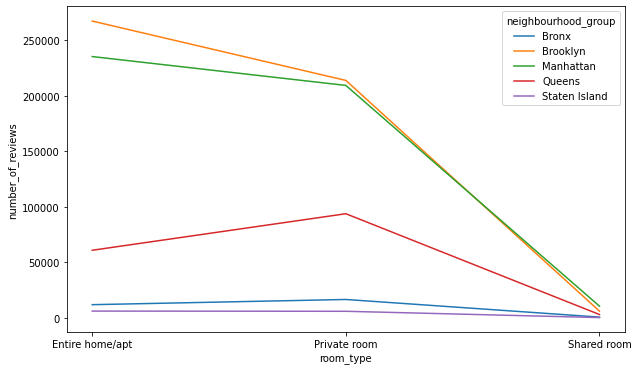

In [27]:
plt.figure(figsize=[10,6])
sns.lineplot(data=count_reviews_room_type, x='room_type', y='number_of_reviews', hue='neighbourhood_group')

1. In every neighbourhood_group, 'Shared room' are the lowest reviewed hotels.
2. Brooklyn is the highest reviewed region for 'Entire home/apt' and 'Private room' followed closely by Manhattan.
3. Staten Island is the lowest reviewed overall, followed closely by Bronx.

**Find out the Busiest Host**

In [28]:
busiest_hosts = new_df.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by= 'number_of_reviews', ascending = False).head(10)
busiest_hosts

,host_name,room_type,number_of_reviews
3436,Dona,Private room,629
6335,Jj,Private room,607
8980,Maya,Private room,543
2166,Carol,Private room,540
2977,Danielle,Private room,510
1216,Asa,Entire home/apt,488
13843,Wanda,Private room,480
7905,Linda,Private room,474
2949,Dani,Entire home/apt,467
865,Angela,Private room,466


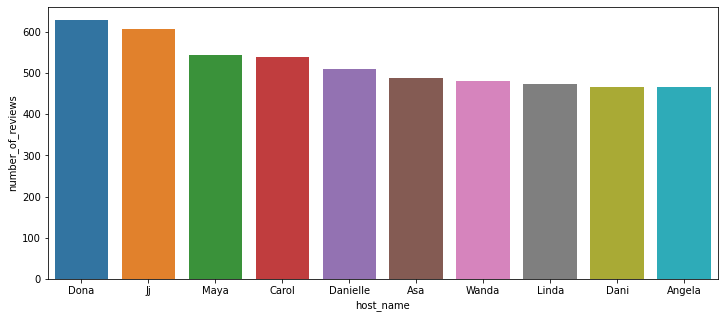

In [29]:
# creating the bar plot
'''name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
fig = plt.figure(figsize = (12, 5))
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.bar(name, reviews, color ='blue', width = 0.3)
plt.show()'''

plt.figure(figsize=[12,5])
sns.barplot(data = busiest_hosts, x='host_name', y='number_of_reviews')

1. According to data, the 'Dona' is the most busiest host followed by 'Jj'
2. Most of the busiest room Types are private room and entire home.

**Hosts with most no. of listings**

In [30]:
host_listing = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)
host_listing[:10]

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,106929
1838,Blueground,Manhattan,53360
7279,Kara,Manhattan,14669
13220,Sonder,Manhattan,9216
6544,Jeremy & Laura,Manhattan,9216
2905,Corporate Housing,Manhattan,8281
7484,Kazuya,Queens,8137
7550,Ken,Manhattan,7500
11403,Pranjal,Manhattan,4225
9860,Mike,Manhattan,2824


1. Host name 'Sonder(NYC)' leads the most expensive Host in NYC with around 106929 properties listed.
2. Most of the listings are from Manhattan neighbourhood group.

**Plotting hotels using their longitude and latitude**

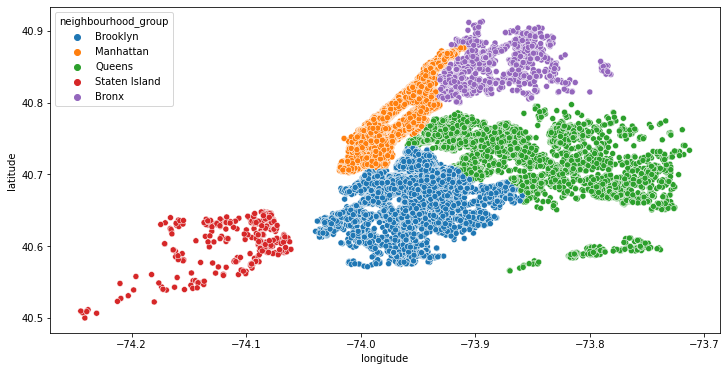

In [31]:
# plot whole new york city with the reference of 'neighbourhood_groups'
plt.figure(figsize=[12, 6])
sns.scatterplot(data = new_df, y='latitude', x='longitude', hue='neighbourhood_group')

**Availability (0-365) of hotels**

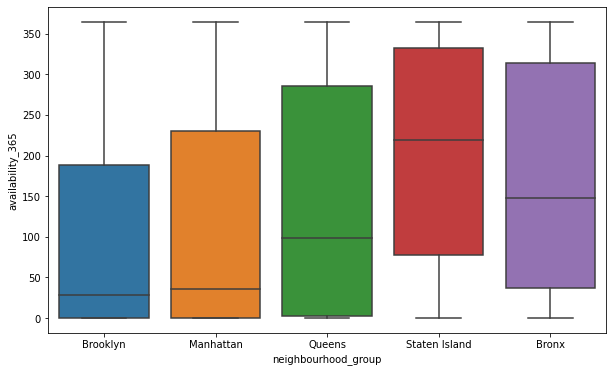

In [32]:
plt.figure(figsize=[10,6])
sns.boxplot(data=new_df, x='neighbourhood_group', y='availability_365')

**Let us find Availability Hotels of particular neighbourhood groups**

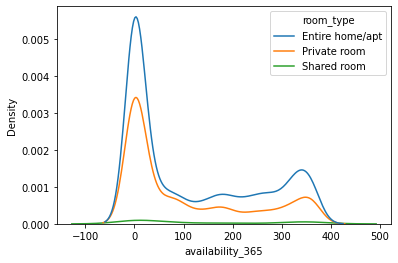

In [33]:
# availability of each type of hotel in every neigbourhood_group
# for Manhattan
sns.kdeplot(data=new_df[new_df['neighbourhood_group'] == 'Manhattan'], x='availability_365', hue='room_type')

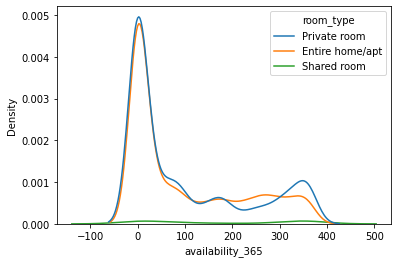

In [34]:
# for Brooklyn
sns.kdeplot(data=new_df[new_df['neighbourhood_group'] == 'Brooklyn'], x='availability_365', hue='room_type')

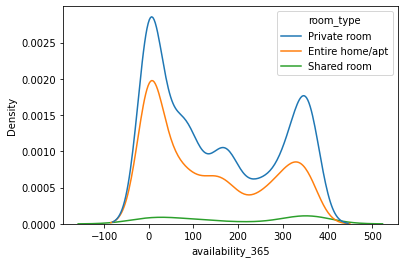

In [35]:
# for Queens
sns.kdeplot(data=new_df[new_df['neighbourhood_group'] == 'Queens'], x='availability_365', hue='room_type')

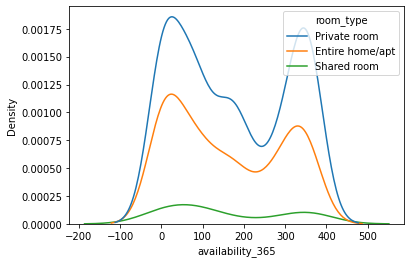

In [36]:
 # Bronx
sns.kdeplot(data=new_df[new_df['neighbourhood_group'] == 'Bronx'], x='availability_365', hue='room_type')

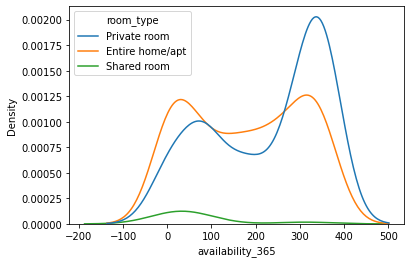

In [37]:
#Staten Island
sns.kdeplot(data=new_df[new_df['neighbourhood_group'] == 'Staten Island'], x='availability_365', hue='room_type')

Availability Hotels Conclusion:
1. As per graph it shows that most of the rooms type 'Entire home/apt' and 'Private room' are booked year around For Manhattan and Brooklyn. This can be due to the advanced booking done by tourists.
2. Hence there are small portions of hotels available year around, this factor also aids increased prices of hotels in these regions(manhattan & Brooklyn).
3. Queens has a much larger portion of hotels available year around, explaining its cheap price compared to Brooklyn and Manhattan.
4. Bronx and Staten Island are not a big tourist attraction and hence a large portion of hotels are available year around. thats why hotels are cheaper here.

**Lets find minimum nights a person stays in different types of hotels in every neigbourhood_group**

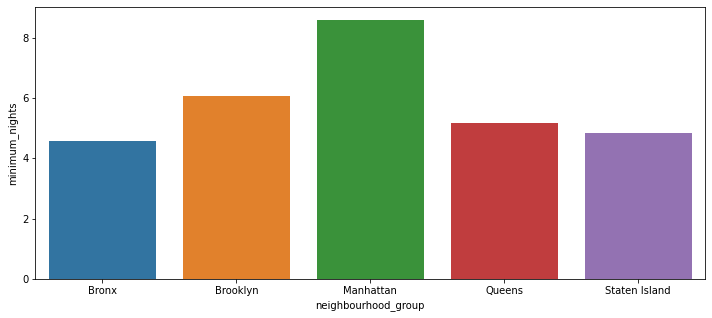

In [38]:
min_nights = new_df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
plt.figure(figsize=[12, 5])
sns.barplot(data=min_nights, x='neighbourhood_group', y='minimum_nights')

In Manhattan neighbourhood group, People stayed max night followed by Brooklyn neighbourhood group.

# **Conclusion**

*   The Most no. of hotel belongs to 'Manhattan' followed by 'Brooklyn' as order of Hotel are - Manhattan > Brooklyn > Queens > Bronx > Staten Island.
*   In NYC City, 'Entire home/apt' & 'Private Room' are the most Popular Room types.
*   In Manhattan, Most popular room types is 'Entire home/apt' while in other neighbouhood groups the most popular room types are 'Private Rooms' then 'Entire home/apt'.
*   'Entire home/apt' is most expensive room types followed by 'Private room' & 'Shared Room'.
*   Manhattan has most number of listings, followed by Brooklyn and Queens. Thats the reason 'manhattan' is the costliest neighbourood groups.
*   Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens as there is decent demand in the neighbourhoods of Queens.
*   Host name 'Sonder(NYC)' leads the most expensive Host in NYC with around 106929 properties listed.
*   As per reviews data, Brooklyn and Manhattan are most liked neighbourhood groups by people.
*   In Brooklyn and Manhattan, there are less chances of availability of rooms because most of the hotels are either booked or available for less than 50 - 60 days in year. While in Staten Island and Bronx hotels are more available throughout the year as less demand in these neighbourhood groups.
*   Host Name 'Dona' is the most busiest host followed by 'Jj'
*   A person spends most in nights in this order: Manhattan > Brooklyn > Queens > Staten Island > Bronx.